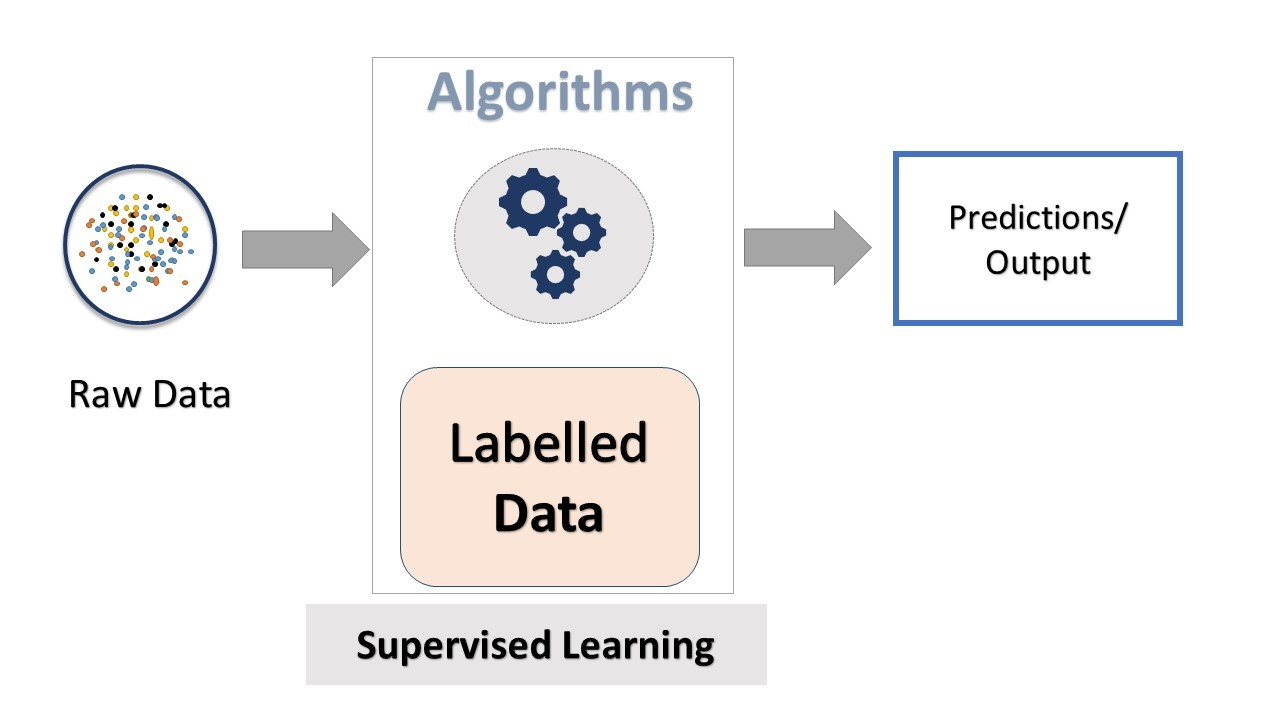

In [5]:
# What is ipynb?
import pandas as pd
import numpy as np


In [6]:
games = pd.read_csv('game_data.csv')
players = pd.read_csv('player.csv')
test = pd.read_csv('game_test.csv')

In [7]:
# Pandas is a library that helps you read in data and manipulate it
games.head()

,home_team_id,away_team_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,...,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_team_goal,away_team_goal,year
0,8635,8342,38391,38388,13423,38389,148302,37262,69653,38393,...,3.0,7.0,7.0,7.0,7.0,10.0,10.0,3,0,2012
1,9985,9993,38797,38795,164229,129462,119117,38969,104389,71466,...,3.0,7.0,7.0,7.0,10.0,10.0,10.0,6,1,2012
2,9997,8571,37937,3329,7683,178486,36522,38354,37866,37972,...,7.0,7.0,7.0,7.0,7.0,10.0,10.0,0,0,2012
3,10000,9987,37900,37100,41005,46877,37886,208984,131531,208986,...,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1,1,2012
4,1773,9994,131408,37051,179059,94419,39335,39578,38323,37963,...,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1,1,2012


In [8]:
games.columns
# Label (Y) is home_team_goal > away_team_goal

Index(['home_team_id', 'away_team_id', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
       'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'h

In [9]:
test.columns

Index(['home_team_id', 'away_team_id', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10',
       'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3',
       'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7',
       'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
       'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
       'home_player_X9', 'home_player_X10', 'home_player_X11',
       'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
       'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'h

In [10]:
players.columns

Index(['year', 'player_id', 'overall_rating', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'ball_control', 'dribbling'],
      dtype='object')

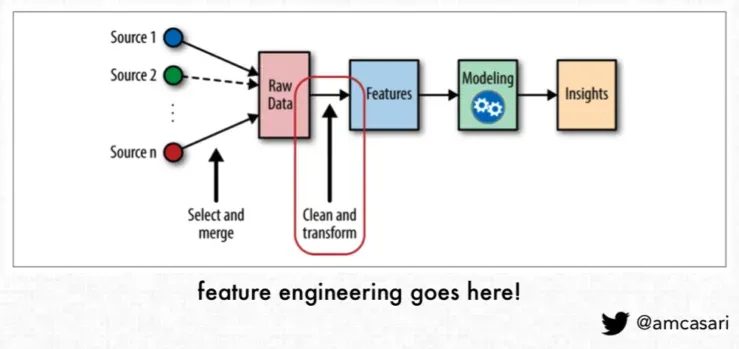

In [11]:
def get_player_attributes(player_id, year, player_dict):
    """Retrieve attributes for a single player, using predicted values for test set."""
    year = 2015 if year == 2016 else year  # Use 2015 data for 2016 games
    if pd.notna(player_id) and (player_id, year) in player_dict:
        player = player_dict[(player_id, year)]
        return [player.get(attr, np.nan) for attr in ['overall_rating', 'crossing', 'ball_control']]
    return [np.nan] * 3  # Return NaN for missing players

def get_all_rates(df, player_dict):
    """Get all player rates for each game."""
    new_columns = {}
    for team in ['home', 'away']:
        for i in range(1, 12):
            col = f'{team}_player_{i}'
            attributes = df.apply(lambda row: get_player_attributes(row[col], row['year'], player_dict), axis=1, result_type='expand')
            for j, attr in enumerate(['overall_rating', 'ball_control', 'crossing']):
                new_columns[f'{team}_player_{i}_{attr}'] = attributes[j]
    return pd.DataFrame(new_columns)


In [12]:
def preprocess_data(df, players_df, is_test=False):
    """Main preprocessing function."""
    if is_test:
        df['year'] = 2016  # Assign year 2016 for test set
    
    players_df_cleaned = players_df.drop_duplicates(subset=['player_id', 'year'], keep='first')
    player_dict = players_df_cleaned.set_index(['player_id', 'year']).to_dict('index')
    
    player_rates = get_all_rates(df, player_dict)
    return pd.concat([df, player_rates], axis=1)

X = preprocess_data(games, players, is_test=False)
X_predict = preprocess_data(test, players, is_test=True)

In [13]:
X.head()

,home_team_id,away_team_id,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,...,away_player_8_crossing,away_player_9_overall_rating,away_player_9_ball_control,away_player_9_crossing,away_player_10_overall_rating,away_player_10_ball_control,away_player_10_crossing,away_player_11_overall_rating,away_player_11_ball_control,away_player_11_crossing
0,8635,8342,38391,38388,13423,38389,148302,37262,69653,38393,...,78.0,72.0,68.0,76.0,70.0,56.0,61.0,68.0,66.0,71.0
1,9985,9993,38797,38795,164229,129462,119117,38969,104389,71466,...,66.0,63.0,60.0,65.0,68.0,55.0,71.0,65.0,56.0,65.0
2,9997,8571,37937,3329,7683,178486,36522,38354,37866,37972,...,67.0,66.0,65.0,63.0,66.0,61.0,68.0,66.0,63.0,64.0
3,10000,9987,37900,37100,41005,46877,37886,208984,131531,208986,...,63.0,72.0,69.0,73.0,74.0,66.0,69.0,72.0,58.0,71.0
4,1773,9994,131408,37051,179059,94419,39335,39578,38323,37963,...,68.0,67.0,65.0,74.0,70.0,65.0,72.0,67.0,60.0,71.0


In [14]:
X.columns

Index(['home_team_id', 'away_team_id', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8',
       ...
       'away_player_8_crossing', 'away_player_9_overall_rating',
       'away_player_9_ball_control', 'away_player_9_crossing',
       'away_player_10_overall_rating', 'away_player_10_ball_control',
       'away_player_10_crossing', 'away_player_11_overall_rating',
       'away_player_11_ball_control', 'away_player_11_crossing'],
      dtype='object', length=137)

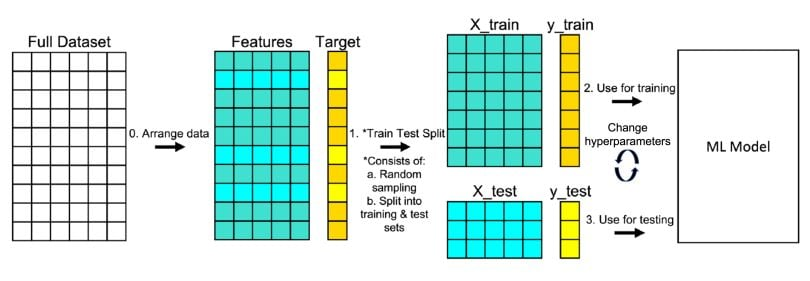

In [15]:
from sklearn.model_selection import train_test_split

x_input = X.copy()
# Define target variable (1 if home team wins, 0 if away team wins)
x_input['winner'] = x_input['home_team_goal'] > x_input['away_team_goal']

# Drop unnecessary columns for training
y = x_input['winner']
x_input = x_input[['away_player_8_crossing', 'away_player_8_ball_control', 'away_player_8_overall_rating']]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_input, y, test_size=0.2, random_state=42)

Example of supervised machine learning algorithm:  
Linear Regression  
Logistic Regression  
Decision Trees  
Random Forest  
Support Vector Machines (SVM)  
Gradient Boosting Machines (GBM)  
Neural Networks  

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Train the linear regression model
model_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('regressor', LinearRegression())  # XGBoost Regressor
])

model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)
y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Convert to binary outcome (1 or 0)

# Evaluate the model
# Number of Correct Predctions / Total Number of Predictions
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.56


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


# Create and compile the winner prediction model
winner_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

winner_model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduced learning rate
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the winner prediction model
winner_history = winner_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

# Make predictions on the test set
y_pred = winner_model.predict(X_test)
y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Convert to binary outcome (1 or 0)

# Evaluate the model
# Number of Correct Predctions / Total Number of Predictions
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy:.2f}')


/Users/Jonghyeok/code/stat440/data_jam/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step
Accuracy: 0.55


In [18]:
# Use the model to make predictions on the test set
y_pred = winner_model.predict(X_predict[['away_player_8_crossing', 'away_player_8_ball_control', 'away_player_8_overall_rating']])
y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Convert to binary outcome (1 or 0)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step


In [19]:
ans = pd.read_csv('is_home_winner.csv')
accuracy = accuracy_score(ans, y_pred_class)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.56


Improve
1. Features 
2. Model
3. Others
   1. Handling NA
   2. Cross Validation
   3. Hyperparameter Tuning